In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#to make the interactive maps
import folium
from folium.plugins import FastMarkerCluster
import geopandas as gpd
from branca.colormap import LinearColormap
from folium.plugins import FastMarkerCluster, MarkerCluster

#to make the plotly graphs
import plotly.graph_objs as go
import plotly.plotly as py
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

#text mining
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud

## 1.2 The listings and listing details files
The dataset that I created contains a total of 7 files. The listings file is an overview file that insideairbnb labels as "good for visualizations". The unique identifier in the dataset is the "listing" id. This is basically the id of the advertisement. Overall, there were 12,223 Airbnb-listings in Bali on Mei, 31 2024.

In [105]:
print(os.listdir("../input"))

['airbnb-amsterdam', 'bv-project-data']


In [106]:
listings = pd.read_csv("/kaggle/input/bv-project-data/listings.csv")

In [107]:
print(listings.shape)

(12228, 29)


The listings file contains 29 variables per listing besides the id.

In [108]:
listings.columns

Index(['listing_id', 'bathrooms', 'bedrooms', 'beds', 'business_travel_ready',
       'city', 'host_languages', 'latitude', 'longitude',
       'monthly_price_factor', 'name', 'neighborhood', 'new_listing',
       'person_capacity', 'price_rate', 'price_rate_type', 'property_type',
       'refundable', 'reviews_count', 'room_type', 'scrim_color',
       'section_offset', 'star_rating', 'superhost', 'tier_id', 'user_id',
       'user_name', 'verified', 'weekly_price_factor'],
      dtype='object')

The listings_details file contains a total of 29 variables. I am not going to use all of these, but selectively joined a number of variables that seemed useful to me for this EDA.

In [109]:
listings=listings.dropna()

# 2. Data exploration
## 2.1 Neighbourhoods
Neighbourhood "De Baarsjes" holds most listings, and altogether eight neigbourhoods have over one thousand listings.



In [110]:
data=pd.read_csv('/kaggle/input/bv-project-data/bukitvistaproperti.csv')

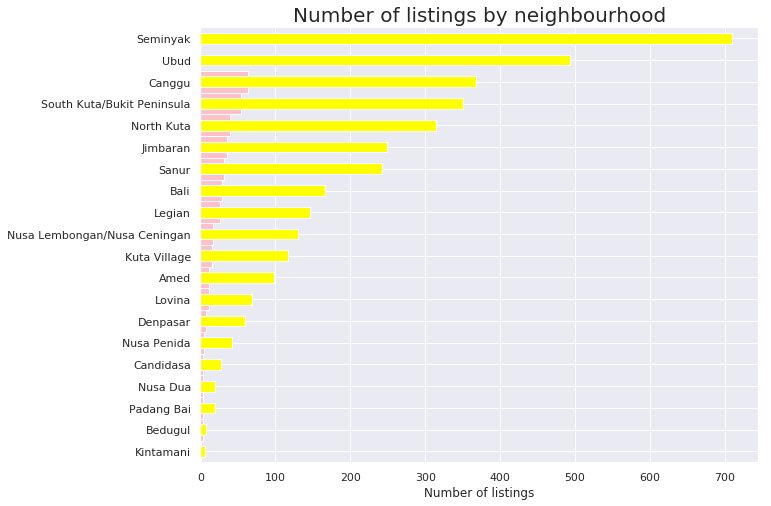

In [111]:
# First plot in pink
feq = data['neighborhood'].value_counts().sort_values(ascending=True)
plt.figure(figsize=(10, 8))
feq.plot.barh(color='pink', width=1)
plt.title("Number of listings by neighbourhood", fontsize=20)
plt.xlabel('Number of listings', fontsize=12)

fis=listings['neighborhood'].value_counts().sort_values(ascending=True)
fis.plot.barh(color='yellow', width=0.5)
plt.show()

Below, you can see that most listings are in the city centre. This map is interactive, and you can zoom-in on the clusters to eventually find the individual locations of the listings.

Note: In a later version I made a map on the average daily price per neighoudhood (section 4.1). I think this map would also be better at this point (as it uses the neighbourhood shapefile), but as my main goal of this kernel is to learn as much as possible I left the map below unchanged as FastMarkerCluster seems useful for the future.

In [112]:
listings_all=pd.read_csv('/kaggle/input/bv-project-data/listings.csv')

In [113]:
listings_all['latitude'].unique()

array(['-8.335.871.047.770.870', '-8.336.109.412.631.440',
       '-8.334.680.011.420.150', ..., '-8.685.924.978.406.070',
       '-8.671.805.283.563.810', '-8.677.727.849.579.000'], dtype=object)

In [114]:
listings_all['latitude'].unique()

array(['-8.335.871.047.770.870', '-8.336.109.412.631.440',
       '-8.334.680.011.420.150', ..., '-8.685.924.978.406.070',
       '-8.671.805.283.563.810', '-8.677.727.849.579.000'], dtype=object)

In [115]:
import re

# Function to correct latitude values
def correct_latitude(lat):
    # Extract numbers from the latitude string
    numbers = re.findall(r'\d+', lat)
    
    # If the extracted numbers length is greater than or equal to 8
    if len(numbers) >= 8:
        # Join the first eight numbers as a single string
        corrected_lat = '-8.' + ''.join(numbers[1:])
    else:
        corrected_lat = '-8.' + ''.join(numbers[1:])
    
    return corrected_lat

# Apply the function to the latitude column
listings_all['latitude'] = listings_all['latitude'].apply(correct_latitude)

In [116]:
listings_all['longitude'].unique()

array(['11.564.906.972.524.300', '11.565.026.317.168.600',
       '1.156.467.642.481.940', ..., '11.516.562.524.113.500',
       '11.514.947.051.828.700', '11.516.209.135.827.400'], dtype=object)

In [117]:
import re

def correct_longitude(long):
    # Extract numbers from the longitude string
    numbers = re.findall(r'\d+', long)
    # Flatten the list of numbers into a single string
    flat_numbers = ''.join(numbers)
    
    # Ensure the corrected longitude starts with '115.' and includes all subsequent numbers
    if len(flat_numbers) >= 3:
        corrected_long = flat_numbers[:3] + '.' + flat_numbers[3:]
    else:
        corrected_long = flat_numbers[:3] + '.' + flat_numbers[3:]
    
    return corrected_long

# Apply the function to the latitude column
listings_all['longitude'] = listings_all['longitude'].apply(correct_longitude)


In [118]:
listings_all['longitude'].unique()

array(['115.64906972524300', '115.65026317168600', '115.6467642481940',
       ..., '115.16562524113500', '115.14947051828700',
       '115.16209135827400'], dtype=object)

In [119]:
data

listing_id         ...           weekly_price_factor
0                6384209         ...                          0.80
1                 945876         ...                          0.90
2               17634694         ...                          1.00
3               15399711         ...                          0.75
4               24049870         ...                          1.00
5               19920422         ...                          1.00
6    1004835884097324662         ...                          0.90
7               10065294         ...                          1.00
8               10075216         ...                          0.97
9               10092824         ...                          0.95
10              10147755         ...                          0.92
11   1015667316308114098         ...                          1.00
12   1016213851582186601         ...                          0.90
13            1018643601         ...                          1.00
14            1018643602         ...                          1.00
15   1022843754091489904         ...                          1.00
16   1024900394046757694         ...                          1.00
17   1027772232491996045         ...                          1.00
18            1030738401         ...                          1.00
19            1030738402         ...                          1.00
20              10310041         ...                          0.86
21   1035769871062218759         ...                          0.94
22   1035962466475532552         ...                          1.00
23   1036519593363412521         ...                          0.95
24   1036528488242506860         ...                          0.98
25   1036571442823338002         ...                          0.95
26   1036603114190236776         ...                          1.00
27   1037206852951362289         ...                          0.90
28   1040125722418000812         ...                          0.85
29   1044664923164630741         ...                          1.00
..                   ...         ...                           ...
334            919443401         ...                          0.95
335            919443402         ...                          0.95
336   922849504371291506         ...                          1.00
337   925604479888073600         ...                          0.93
338   927262416201739948         ...                          1.00
339   927881048219993029         ...                          1.00
340   932984479735501086         ...                          1.00
341   933648339608283584         ...                          0.95
342          9,33711E+17         ...                          1.00
343   934343510031433626         ...                          0.95
344   935054477912222554         ...                          1.00
345   937259763982028608         ...                          1.00
346   939721287668323835         ...                          0.90
347   941611919204107601         ...                          0.95
348               945876         ...                          0.85
349   946773342803250050         ...                          1.00
350   950310466851839780         ...                          0.95
351   958337951790732335         ...                          0.90
352   964395021679424160         ...                          1.00
353   967758571203169944         ...                          0.88
354   969923892985988076         ...                          0.97
355   970749028985448326         ...                          0.91
356   971293090297218907         ...                          0.88
357   971311870626576158         ...                          1.00
358   972892111148959758         ...                          0.90
359   974264859799497762         ...                          1.00
360   975065280053213992         ...                          0.95
361   975623678232397432         ...                         

In [120]:
locationsbv

[('-8.371135512341', '115.20610442987400'),
 ('-8.835035405816660', '115.20561528710800'),
 ('-8.679799736828', '115.11224366675000'),
 ('-8.827689451776480', '115.0891127254120'),
 ('-8.809691562727380', '115.11617816173100'),
 ('-8.835009650278810', '115.12083117975900'),
 ('-8.332659576483', '115.10254937611600'),
 ('-8.916017699991', '115.26454217690800'),
 ('-8.785474211206460', '115.15818650120400'),
 ('-8.765644812874410', '115.2172665551980'),
 ('-8.247821571579', '115.16648625650500'),
 ('-8.680720625482980', '115.15572614069800'),
 ('-8.501937', '115.250061'),
 ('-8.691036234874120', '115.16632233868000'),
 ('-8.695323171922590', '115.17104695218200'),
 ('-8.683204237572920', '115.16288183219800'),
 ('-8.690514918765460', '115.16725685739400'),
 ('-8.454223911061', '115.43717422555000'),
 ('-8.838273', '115.175652'),
 ('-8.825861376896060', '115.15254777014100'),
 ('-8.735223003554590', '115.16992881835100'),
 ('-8.546248976322410', '115.26390925325900'),
 ('-8.158326871026',

In [121]:
data['longitude']=data['longitude'].apply(correct_longitude)
data['latitude']=data['latitude'].apply(correct_latitude)
longbv=data['longitude'].tolist()
latbv=data['latitude'].tolist()
locationsbv = list(zip(latbv, longbv))
map2=folium.Map(location=[-8.650000, 115.216667], zoom_start=11.5)
FastMarkerCluster(data=locationsbv).add_to(map2)
map2

In [122]:
lats2018 = listings_all['latitude'].tolist()
lons2018 = listings_all['longitude'].tolist()
locations = list(zip(lats2018, lons2018))

map1 = folium.Map(location=[-8.650000, 115.216667], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map1)
marker_cluster = MarkerCluster(data=locations).add_to(map1)
map1



In [123]:
# Create the base map
combined_map = folium.Map(location=[-8.650000, 115.216667], zoom_start=11.5)

# Add FastMarkerCluster for the first set of locations with a specific color
FastMarkerCluster(data=locations, icon_create_function="""
    function(cluster) {
        return L.divIcon({
            html: '<div style="background-color: rgba(255, 0, 0, 0.6); border-radius: 50%; width: 40px; height: 40px; display: flex; align-items: center; justify-content: center;"><span style="color: white;">' + cluster.getChildCount() + '</span></div>',
            className: 'marker-cluster'
        });
    }
""").add_to(combined_map)

# Add FastMarkerCluster for the second set of locations with a different color
FastMarkerCluster(data=locationsbv, icon_create_function="""
    function(cluster) {
        return L.divIcon({
            html: '<div style="background-color: rgba(0, 0, 255, 0.6); border-radius: 50%; width: 40px; height: 40px; display: flex; align-items: center; justify-content: center;"><span style="color: white;">' + cluster.getChildCount() + '</span></div>',
            className: 'marker-cluster'
        });
    }
""").add_to(combined_map)

# Display the combined map
combined_map

In [124]:
# Apply correction functions (implementasi koreksi sesuai data)
listings['longitude'] = listings['longitude'].apply(correct_longitude)
listings['latitude'] = listings['latitude'].apply(correct_latitude)
data['longitude'] = data['longitude'].apply(correct_longitude)
data['latitude'] = data['latitude'].apply(correct_latitude)

# Data Preparation for map1
lats2018 = listings['latitude'].tolist()
lons2018 = listings['longitude'].tolist()
prices1 = listings['price_rate'].tolist()
locations1 = list(zip(lats2018, lons2018, prices1))

# Data Preparation for map2
longbv = data['longitude'].tolist()
latbv = data['latitude'].tolist()
prices2 = data['price_rate'].tolist()
locations2 = list(zip(latbv, longbv, prices2))

# Function to determine the color based on price_rate
def get_color(price):
    if price < 50:
        return 'green'
    elif 50 <= price < 100:
        return 'orange'
    else:
        return 'red'

# Create the base map
combined_map = folium.Map(location=[-8.650000, 115.216667], zoom_start=11.5)

# Add markers for the first set of locations (listings)
marker_cluster1 = MarkerCluster().add_to(combined_map)
for lat, lon, price in locations1:
    folium.CircleMarker(
        location=[lat, lon],
        radius=5,
        color=get_color(price),
        fill=True,
        fill_color=get_color(price),
        fill_opacity=0.7,
        popup=f'Price: {price}'
    ).add_to(marker_cluster1)

# Add markers for the second set of locations (data)
marker_cluster2 = MarkerCluster().add_to(combined_map)
for lat, lon, price in locations2:
    folium.CircleMarker(
        location=[lat, lon],
        radius=5,
        color=get_color(price),
        fill=True,
        fill_color=get_color(price),
        fill_opacity=0.7,
        popup=f'Price: {price}'
    ).add_to(marker_cluster2)

# Display the combined map
combined_map

## 2.2 Room types and property types
### 2.2.1 Room types
The room type is very important in Bali, because Bali has a rule that Entire homes/apartments can only be rented out via Airbnb for a maximum of 60 days a year. Below, we can see that this restriction applies to most of the listings.

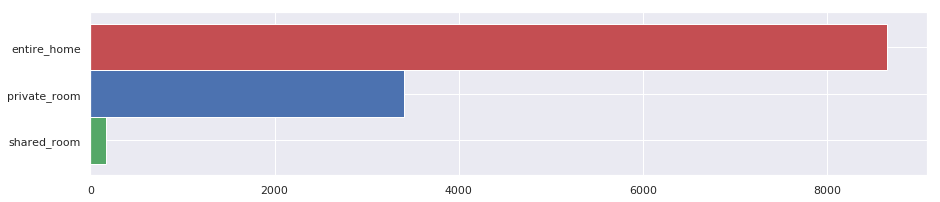

In [125]:
freq = listings_all['room_type']. value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(15, 3), width=1, color = ["g","b","r"])
plt.show()

### 2.2.2 Property types
In the dataset, we find a lot of different property types.

In [126]:
listings.property_type.unique()

array([40.,  9.,  3., 43., 11., 42.,  2., 60., 38.,  1.,  6., 47., 53.,
       23., 39., 33., 44., 17., 67.,  4., 24., 35., 56., 22., 45.,  5.,
        8., 34., 36., 37., 65., 12.])

However, many of those property types have very few listings in Bali. In the figure below, I am only displaying property types with at least 100 listings. As we can see, the vast majority of the properties in Bali are apartments.

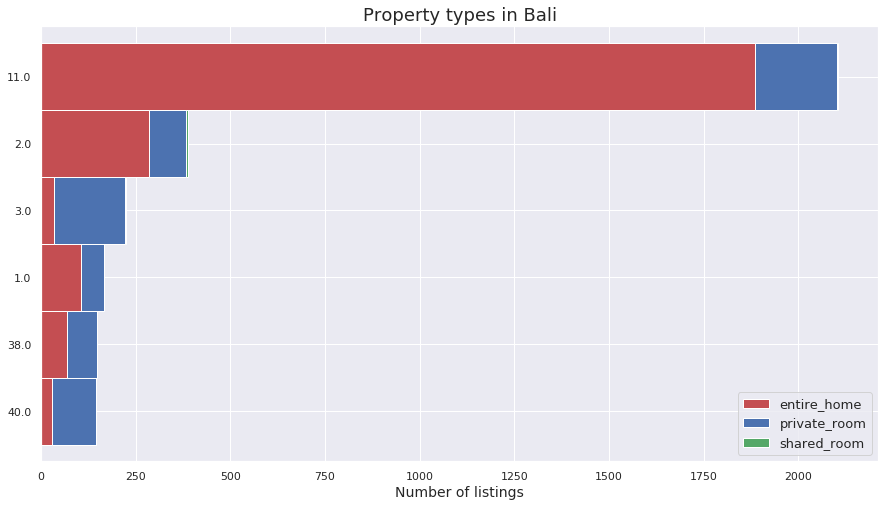

In [127]:
prop = listings.groupby(['property_type','room_type']).room_type.count()
prop = prop.unstack()
prop['total'] = prop.iloc[:,0:3].sum(axis = 1)
prop = prop.sort_values(by=['total'])
prop = prop[prop['total']>=100]
prop = prop.drop(columns=['total'])

prop.plot(kind='barh',stacked=True, color = ["r","b","g"],
              linewidth = 1, grid=True, figsize=(15,8), width=1)
plt.title('Property types in Bali', fontsize=18)
plt.xlabel('Number of listings', fontsize=14)
plt.ylabel("")
plt.legend(loc = 4,prop = {"size" : 13})
plt.rc('ytick', labelsize=13)
plt.show()

## 2.3 Accommodates (number of people)
As expected, most listings are for 2 people. In addition, Airbnb uses a maximum of 16 guests per listing.

In [128]:
listings['accommodates']=listings['person_capacity']

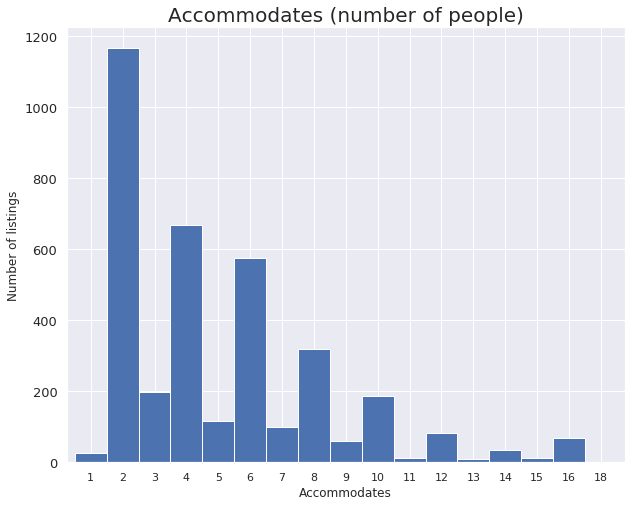

In [129]:
feq=listings['accommodates'].value_counts().sort_index()
feq.plot.bar(figsize=(10, 8), color='b', width=1, rot=0)
plt.title("Accommodates (number of people)", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.xlabel('Accommodates', fontsize=12)
plt.show()

However, Bali has an additional restriction. Due to fire hazard considerations and also taking possible noisy group into account, owners are only allowed to rent their property to groups with a maximum of 4 people. This actually means that the listings that indicate that the maximum number of people is above 4 are breaking this rule!

# 3. Advice to the municipality of Bali

It is known that Airbnb causes problems in Bali. These problems are described well in this article: [Fed Up With Tourists, Bali Gets Tough On Airbnb, Tourist Taxes And Too Much Partying](https://www.forbes.com/sites/ceciliarodriguez/2018/05/17/Bali-overwhelmed-by-tourists-gets-tough-on-airbnb-tourists-taxes-too-much-partying/#5c6c78892be5)

>The coalition of parties forming the city’s new government wants to follow the examples of Barcelona and Venice, where the flood of unruly tourism has made life extremely unpleasant for residents, forcing  officials to try to control the number of visitors and their behavior.

Extra rules that Bali has in place when compared to Airbnb's own rules are:

* The maximum number of guests is 4 (see also previous section)
* The maximum number for short-term rental is 60 days per calendar year. This rules is only for renting out entire properties, and therefore does not apply to renting out private rooms. This rule was already enforced by Airbnb (after 60 days of bookings, Airbnb closes the availability of the listing for the rest of the year). As you can read in the article, the number will be lowered to a maximum of 30 days a year.
* Bali intends to ban Airbnb entirely in three neighourhoods: de Wallen (Red Light District), Kinkerbuurt and Haarlemmerbuurt
* For renting out Private Rooms, there is also the restriction that an owner cannot rent-out rooms that accumulate to more than 40% of the total surface (in square meters)

## 3.1 Finding possibly illegal hotels
Any owner renting out more than 40% of his/her property as Private Rooms is breaking the last rule mentioned in the previous section, but in this section I am only going to look for extreme cases.

Below, I am displaying the  five hosts having the most Private Room listings. Unfortunately, Airbnb does not give the addresses of the listings. The field "street" is actually in the database, but as you can see these are certainly not full, real addresses! Therefore, from this table I cannot say if these listings from are in fact in the same house.


In [130]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3636 entries, 1 to 12225
Data columns (total 30 columns):
listing_id               3636 non-null int64
bathrooms                3636 non-null float64
bedrooms                 3636 non-null float64
beds                     3636 non-null float64
business_travel_ready    3636 non-null bool
city                     3636 non-null object
host_languages           3636 non-null object
latitude                 3636 non-null object
longitude                3636 non-null object
monthly_price_factor     3636 non-null float64
name                     3636 non-null object
neighborhood             3636 non-null object
new_listing              3636 non-null bool
person_capacity          3636 non-null int64
price_rate               3636 non-null int64
price_rate_type          3636 non-null object
property_type            3636 non-null float64
refundable               3636 non-null bool
reviews_count            3636 non-null int64
room_type              

In [131]:
private = listings[listings['room_type'] == "private_room"]
host_private = private.groupby(['user_id', 'user_name', 'city']).size().reset_index(name='private_rooms').sort_values(by=['private_rooms'], ascending=False)
print(host_private.head())

      user_id      ...      private_rooms
70    4266227      ...                 13
379  53779972      ...                 10
159  13396876      ...                  9
401  59669198      ...                  9
408  60881004      ...                  8

[5 rows x 4 columns]


However, we have the GPS-coordinates of the listings. To me, it seems very likely that all private rooms that host Feliciano offers are in fact in the same building (only minor variations in latitude/longitude). Although this host might have a hotel license, his listings seem suspicious too me (what is the name of the hotel?)! I would advise the municipality of Bali to check if no rules are broken in this case.

In [132]:
feliciano = private[private['user_id']== 4266227]
feliciano = feliciano[['name','user_id', 'user_name', 'latitude', 'longitude']]
feliciano.index.name = "listing_id"
feliciano

name         ...                   longitude
listing_id                                                            ...                            
5196            Triple Eco-lofts over secret beach for Groups         ...          115.13009650241100
5251                2Rooms unique Eco Lofts over Secret Beach         ...          115.12925840251700
5654        Seaside Stone Cabins with sandy Private Beach #14         ...           115.1276665494840
5662            Eco-Luxe Honeymoon Hut by Balangan Beachfront         ...          115.12473762450800
5717               Ocean-View Loft by Balangan Beachfront #25         ...          115.12420684158000
5782         Jungle Clifftop Cabin with Forest Canopy Bath #3         ...          115.12998695533200
5819         Two Balinese Modern Residence - Fiber Optic WiFi         ...          115.14893281361100
5833          Well-Decorated Cozy Tranquil Room in South Kuta         ...          115.14996513506300
5866        Luxury Clifftop Jungle cabin with Secret Beach #4         ...          115.12746274999900
5904        Boutique Tropical Room in the Heart of South Kuta         ...          115.14842294925000
10589       Tropical Bingin Beach Hillside Ocean View Cabi...         ...          115.11399060894400
10608       Tropical Bingin Beach Hillside Ocean View Cabi...         ...          115.11470600464700
10657                  Tranquil Tropical House in Pecatu area         ...          115.13955143859500
10715             Sunny Surf Cabins by Padang Padang Beach #8         ...           115.0977663494570
10835       Tropical Bingin Beach Hillside Ocean View Cabi...         ...          115.11435966681700
12025           Eco-Friendly Wooden Bungalows in Uluwatu area         ...          115.09442530087300
12072             Comfort Vintage House with Ocean view, #2BR         ...          115.13779744407500
12101                   Surfer cottages by Uluwatu beaches #8         ...          115.09112619252400

[18 rows x 5 columns]

## 3.2 Unwanted effects of professional hosts?
At the moment, Bali has no rule in place to prevent professional hosting activities. I can imagine that having the option to outsource these activities leads to even more listings. At the moment, about 75% of the hosts only have one listing. I assume that hosts with just a couple of listings are likely to also be the host for a couple of friends. However, we see that there are extreme cases. I believe that it becomes unlikely that hosts with more than 10 listings are just doing this for themselves and friends and family.

In [133]:
freq = listings.groupby(['user_id']).size().reset_index(name='num_host_listings')
host_prop = freq.groupby(['num_host_listings']).size().reset_index(name='count').transpose()
host_prop.columns = host_prop.iloc[0]
host_prop = host_prop.drop(host_prop.index[0])
host_prop

num_host_listings   1    2    3   4   5   6   7  ...  28  30  31  33  44  58  69
count              999  304  138  68  48  19  17 ...   1   1   1   1   1   1   1

[1 rows x 28 columns]

Below, I diplay the hosts with more that 20 listings. Unfortunately, the host_about is not fully scraped. However as this dataset is extremely recent, it was not hard for me to find the host description of the host with 200+ listings on airbnb.com. As you can see, this host clearly is a professional host!

As it is probably hard to implement and control a measure that completely forbids professional hosting activities, I would advise the municipality of Bali to consider setting a maximum number of listings per host. If Bali would set this at for instance 10 (and manages to get this implemented in Airbnb's systems), it would becomes much harder to exploit hosting at Airbnb as a professional activity.

In [134]:
freq = listings.groupby(['user_id', 'user_name']).size().reset_index(name='num_host_listings')
freq = freq.sort_values(by=['num_host_listings'], ascending=False)
freq = freq[freq['num_host_listings'] >= 20]
freq

user_id        ...        num_host_listings
239    4266227        ...                       69
71     1455923        ...                       58
240    4285989        ...                       44
968   40756665        ...                       33
897   33886302        ...                       31
314    5796360        ...                       30
538   13078346        ...                       28
90     1717331        ...                       27
1158  60881004        ...                       22
294    5311605        ...                       20

[10 rows x 3 columns]

# 4. Advice to the tourists
## 4.1 Average daily price per neighbourhood
In order to compare "apples to apples" I have only selected the most common type of accommodation, which is accommodation for 2 persons. As expected, accommodation in the city centre is the most expensive. 

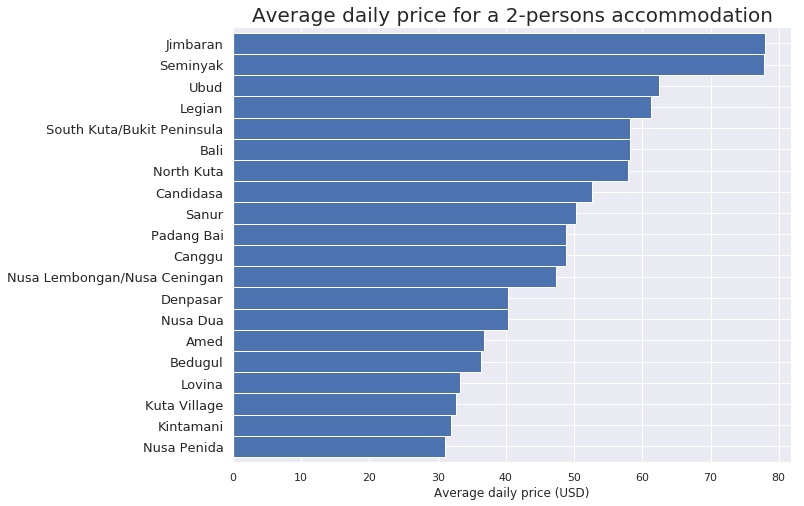

In [135]:
feq = listings[listings['accommodates']==2]
feq = feq.groupby('neighborhood')['price_rate'].mean().sort_values(ascending=True)
feq.plot.barh(figsize=(10, 8), color='b', width=1)
plt.title("Average daily price for a 2-persons accommodation", fontsize=20)
plt.xlabel('Average daily price (USD)', fontsize=12)
plt.ylabel("")
plt.show()

Below you can find the neighbourhoods on a map. This map is **interactive**. Hovering over the polygons shows the name of the neighbourhood, and the average price for 2-persons accommodations.

In [136]:
# adam = gpd.read_file("../input/neighbourhoods.geojson")
# feq = pd.DataFrame([feq])
# feq = feq.transpose()
# adam = pd.merge(adam, feq, on='neighbourhood', how='left')
# adam.rename(columns={'price': 'average_price'}, inplace=True)
# adam.average_price = adam.average_price.round(decimals=0)

# map_dict = adam.set_index('neighbourhood')['average_price'].to_dict()
# color_scale = LinearColormap(['yellow','red'], vmin = min(map_dict.values()), vmax = max(map_dict.values()))

# def get_color(feature):
#     value = map_dict.get(feature['properties']['neighbourhood'])
#     return color_scale(value)

# map3 = folium.Map(location=[52.3680, 4.9036], zoom_start=11)
# folium.GeoJson(data=adam,
#                name='Bali',
#                tooltip=folium.features.GeoJsonTooltip(fields=['neighbourhood', 'average_price'],
#                                                       labels=True,
#                                                       sticky=False),
#                style_function= lambda feature: {
#                    'fillColor': get_color(feature),
#                    'color': 'black',
#                    'weight': 1,
#                    'dashArray': '5, 5',
#                    'fillOpacity':0.5
#                    },
#                highlight_function=lambda feature: {'weight':3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map3)
# map3

## 4.2 Neighbourhood safety
As there is no data on neighbourhood safety in the Airbnb files, I searched for this online and came across the map below. As you can see, nowadays the western parts of the city are the most dangerous.

Personal note: Apparently "de Bijlmer" (south-eastern areas) is reasonably safe these days. However, I used to know somebody who lived there as a student years ago. At that time it certainly was not a good neighbourhood, and I was warned to "stay under the balconies" as people might throw rubbish and old furniture from their balconies. Getting an old couch on your head did not sound like the most pleasant thing in the world ;-).

<center><img src="https://i.imgur.com/7cso9GD.png" style="width: 800px;"/></center>

## 4.3 Review scores location, and location scores versus price
In tis section, I am grouping the review scores for the location by neighbourhood (only listings with at least 10 reviews). Although I expect the distance to the city centre to an important factor, these score should also take other things into account. Other factors may include:

* The safety of a location (as displayed in the previous section)
* Noise. If a listing is centrally located, but surrounded by noisy bars, that should cost points in the location review score.
* If a listing is located outside the city centre but well connected by public transportation, it should get bonus points for that.
* Facilities near the listing. Are there any supermarkets, bars and restaurants nearby?
* Some people may be looking for free parking if they come by car (parking is very expensive in Bali in general).

Below we see that the central neighbourhoods, which were generally also the most expensive, generally also score higher on location review score.  If I would calculate the distance to the city centre for each listing, I expect to see pretty strong correlations between this distance with both price and location review score.

When looking at the average review score, I am surprised to see that the average is above 8/10 for all neighbourhoods! I know that Bali is a small city (much smaller than many people might think!). Therefore, it does not take much time to get to the city centre from anywhere, which might explain the high averages to a certain extend. My personal advice to tourists would be to consider more affordable accommodation outside the city centre, in a safe neighbourhood, and with good public transportation connections to the city centre anyway. However, are the differences between the best locations and outside neighbourhoods really that small? Let's find out in the next section!


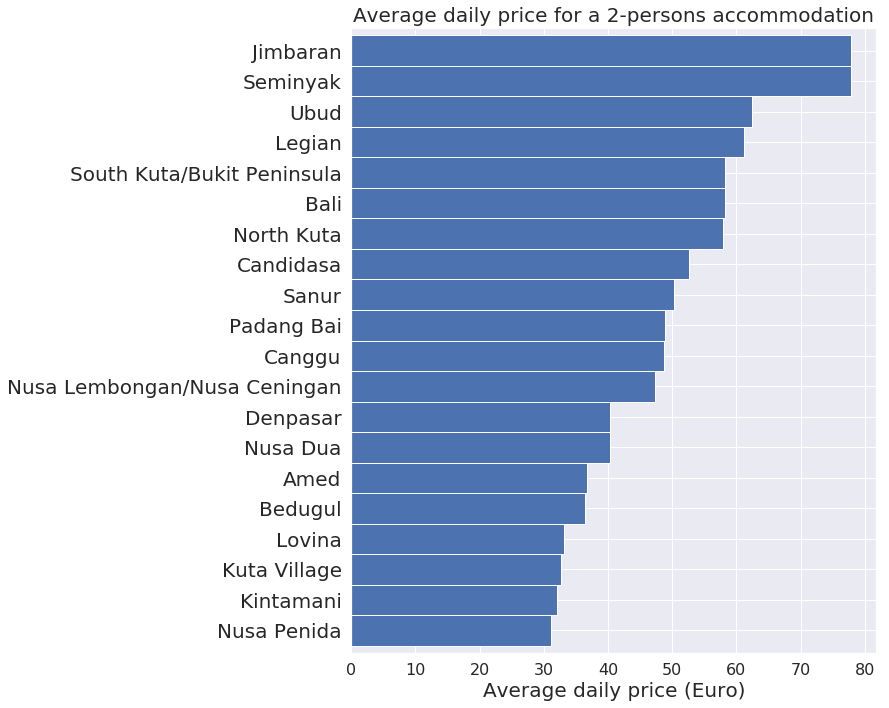

In [137]:
fig = plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=20)

# ax1 = fig.add_subplot(121)
# feq = listings[listings['reviews_count']>=10]
# feq1 = feq.groupby('neighborhood')['review_scores_location'].mean().sort_values(ascending=True)
# ax1=feq1.plot.barh(color='b', width=1)
# plt.title("Average review score location (at least 10 reviews)", fontsize=20)
# plt.xlabel('Score (scale 1-10)', fontsize=20)
# plt.ylabel("")

ax2 = fig.add_subplot(122)
feq = listings[listings['accommodates']==2]
feq2 = feq.groupby('neighborhood')['price_rate'].mean().sort_values(ascending=True)
ax2=feq2.plot.barh(color='b', width=1)
plt.title("Average daily price for a 2-persons accommodation", fontsize=20)
plt.xlabel('Average daily price (Euro)', fontsize=20)
plt.ylabel("")

plt.tight_layout()
plt.show()

## 4.4 How to use review scores
In addition to written reviews, guests can submit an overall star rating and a set of category star ratings. Guests can give ratings on:

* Overall Experience. What was your overall experience?
* Cleanliness. Did you feel that your space was clean and tidy?
* Accuracy. How accurately did your listing page represent your space?
* Value. Did you feel your listing provided good value for the price?
* Communication. How well did you communicate with your host before and during their stay?
* Arrival. How smoothly did their check-in go?
* Location. How did you feel about the neighborhood?

Below you can see the scores distribution of all those categories. What caught my eye immediately is that scores seem really high across the board! A quick internet search told me that this seems common across Airbnb. It is explained well in this article: [Higher than the average rating? 95% of Airbnb listings rated 4.5 to 5 stars](https://mashable.com/2015/02/25/airbnb-reviews-above-average/?europe=true#1YLfzOC34sqd).

After having seen the scores distributions, I would personally consider any score of 8 or lower to be not a good score. If I wanted to use any of these scores in a search for accomodation, I believe the "Value" seems most useful. First of all, I always like to get good value for money ;-). However, the number of "10 averages" is reasonably small, which makes the indicator a bit more "distinguishable" than other indicators.

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 29 columns):
listing_id               364 non-null object
bathrooms                364 non-null float64
bedrooms                 364 non-null float64
beds                     364 non-null float64
business_travel_ready    364 non-null bool
city                     364 non-null object
host_languages           364 non-null object
latitude                 364 non-null object
longitude                364 non-null object
monthly_price_factor     364 non-null float64
name                     364 non-null object
neighborhood             364 non-null object
new_listing              364 non-null bool
person_capacity          364 non-null int64
price_rate               364 non-null int64
price_rate_type          364 non-null object
property_type            364 non-null float64
refundable               364 non-null bool
reviews_count            364 non-null int64
room_type                364 non-null object

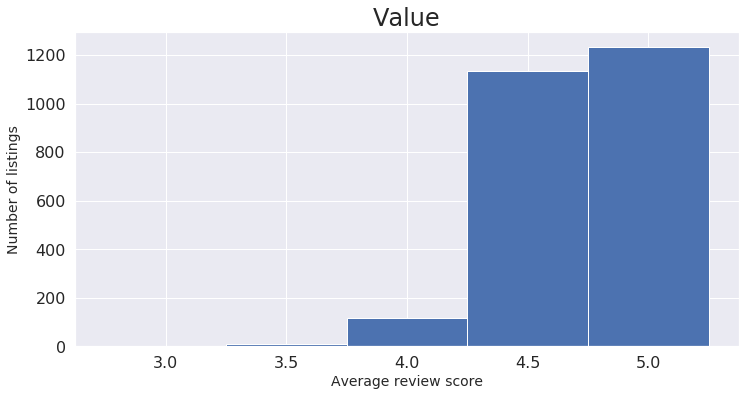

In [139]:
listings10 = listings[listings['reviews_count']>=10]

fig = plt.figure(figsize=(20,15))
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)

# ax1 = fig.add_subplot(321)
# feq=listings10['review_scores_location'].value_counts().sort_index()
# ax1=feq.plot.bar(color='b', width=1, rot=0)
# #ax1.tick_params(axis = 'both', labelsize = 16)
# plt.title("Location", fontsize=24)
# plt.ylabel('Number of listings', fontsize=14)
# plt.xlabel('Average review score', fontsize=14)

# ax2 = fig.add_subplot(322)
# feq=listings10['review_scores_cleanliness'].value_counts().sort_index()
# ax2=feq.plot.bar(color='b', width=1, rot=0)
# plt.title("Cleanliness", fontsize=24)
# plt.ylabel('Number of listings', fontsize=14)
# plt.xlabel('Average review score', fontsize=14)

ax3 = fig.add_subplot(323)
feq=listings10['star_rating'].value_counts().sort_index()
ax3=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Value", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

# ax4 = fig.add_subplot(324)
# feq=listings10['review_scores_communication'].value_counts().sort_index()
# ax4=feq.plot.bar(color='b', width=1, rot=0)
# plt.title("Communication", fontsize=24)
# plt.ylabel('Number of listings', fontsize=14)
# plt.xlabel('Average review score', fontsize=14)

# ax5 = fig.add_subplot(325)
# feq=listings10['review_scores_checkin'].value_counts().sort_index()
# ax5=feq.plot.bar(color='b', width=1, rot=0)
# plt.title("Arrival", fontsize=24)
# plt.ylabel('Number of listings', fontsize=14)
# plt.xlabel('Average review score', fontsize=14)

# ax6 = fig.add_subplot(326)
# feq=listings10['review_scores_accuracy'].value_counts().sort_index()
# ax6=feq.plot.bar(color='b', width=1, rot=0)
# plt.title("Accuracy", fontsize=24)
# plt.ylabel('Number of listings', fontsize=14)
# plt.xlabel('Average review score', fontsize=14)

plt.tight_layout()
plt.show()

## 4.5 Finding a good host
At Airbnb you can get the status "Superhost". From Airbnb:
* As a Superhost, you’ll have more visibility, earning potential, and exclusive rewards. It's our way of saying thank you for your outstanding hospitality.
* How to become a Superhost: Every 3 months, we check if you meet the following criteria. If you do, you'll earn or keep your Superhost status.
    * Superhosts have a 4.8 or higher average overall rating based on reviews from at least 50% of their Airbnb guests in the past year. 
    * Superhosts have hosted at least 10 stays in the past year or, if they host longer-term reservations, 100 nights over at least 3 stays. 
    * Superhosts have no cancellations in the past year, unless there were extenuating circumstances.
    * Superhosts respond to 90% of new messages within 24 hours.

Below, we can see that only a small portion of the listings in Bali do have a host who is Superhost.

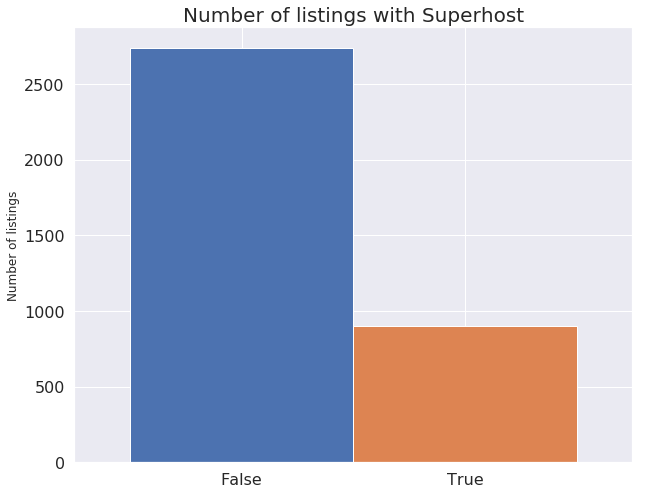

In [140]:
feq=listings['superhost'].value_counts()
feq.plot.bar(figsize=(10, 8), width=1, rot=0)
plt.title("Number of listings with Superhost", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.show()

If I were to book accomomodation, I would not necessarily look for a superhost. Actually, I would be afraid that I would pay too much as superhost will likely increase their prices. However, I would also not want to host that responds badly, or cancels a lot.

As we can see, over 5,000 of the 20,000 listings have at least 10 reviews and respond to at least 90% of the new messages. I would consider those hosts "proven" good responders (which does not mean that a listing with less than 10 reviews cannot have good responding hosts; it is just not proven yet). Also, there are very few listings with hosts not replying to new messages within 24 hours.

In [141]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3636 entries, 1 to 12225
Data columns (total 30 columns):
listing_id               3636 non-null int64
bathrooms                3636 non-null float64
bedrooms                 3636 non-null float64
beds                     3636 non-null float64
business_travel_ready    3636 non-null bool
city                     3636 non-null object
host_languages           3636 non-null object
latitude                 3636 non-null object
longitude                3636 non-null object
monthly_price_factor     3636 non-null float64
name                     3636 non-null object
neighborhood             3636 non-null object
new_listing              3636 non-null bool
person_capacity          3636 non-null int64
price_rate               3636 non-null int64
price_rate_type          3636 non-null object
property_type            3636 non-null float64
refundable               3636 non-null bool
reviews_count            3636 non-null int64
room_type              

In [142]:
listings['host_languages'] = listings['host_languages'].fillna('1')

# Hitung jumlah bahasa dalam setiap entri dan ubah nilai host_languages
listings['host_languages_count'] = listings['host_languages'].apply(lambda x: len(x.split(',')) if x != '1' else 1)

In [143]:
listings.to_csv('datalistings.csv')

In [144]:
pip install pycaret[full]

  ERROR: Could not find a version that satisfies the requirement pycaret[full] (from versions: none)
ERROR: No matching distribution found for pycaret[full]
Note: you may need to restart the kernel to use updated packages.


In [145]:
# check installed version (must be >3.0)
import pycaret
pycaret.__version__

ModuleNotFoundError: No module named 'pycaret'

In [ ]:
# import pycaret regression and init setup
from pycaret.regression import *
s = setup(listings_all, target = 'price_rate', session_id = 123)